In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### 1) Load the data file using pandas

In [3]:
dataset = pd.read_csv('googleplaystore.csv')

In [4]:
dataset.shape

(10841, 13)

In [5]:
dataset.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
dataset.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [7]:
dataset.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### 2) Check for null values in the data

In [8]:
dataset.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### 3) Drop records with nulls in any of the columns

In [9]:
data = dataset.dropna()

In [10]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### 4) Formatting incorrect and inconsistent variables

In [11]:
data['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 9360, dtype: object

### 4.1 Size

In [12]:
data = data[data['Size'].str.contains('Varies with device') == False]
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [13]:
data_M = data[data['Size'].str.contains('M')]
data_M

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2.3M,"100,000+",Free,0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [14]:
data_M['Size'] = data_M['Size'].str.extract('(\d+)')
data_M

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2,"100,000+",Free,0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up
10834,FR Calculator,FAMILY,4.0,7,2,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [15]:
data_M['Size'] = 1000 * data_M['Size'].astype(int)
data_M

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2000,"100,000+",Free,0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up
10834,FR Calculator,FAMILY,4.0,7,2000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [16]:
data_K = data[data['Size'].str.contains('k')]
data_K

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
58,Restart Navigator,AUTO_AND_VEHICLES,4.0,1403,201k,"100,000+",Free,0,Everyone,Auto & Vehicles,"August 26, 2014",1.0.1,2.2 and up
209,Plugin:AOT v5.0,BUSINESS,3.1,4034,23k,"100,000+",Free,0,Everyone,Business,"September 11, 2015",3.0.1.11 (Build 311),2.2 and up
384,Hangouts Dialer - Call Phones,COMMUNICATION,4.0,122498,79k,"10,000,000+",Free,0,Everyone,Communication,"September 2, 2015",0.1.100944346,4.0.3 and up
450,Caller ID +,COMMUNICATION,4.0,9498,118k,"1,000,000+",Free,0,Everyone,Communication,"June 7, 2016",5.28.0,2.3 and up
458,GO Notifier,COMMUNICATION,4.2,124346,695k,"10,000,000+",Free,0,Everyone,Communication,"July 6, 2014",2.8,2.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10732,Draw with FP sDraw,TOOLS,4.3,3268,467k,"100,000+",Free,0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
10755,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676k,"10,000+",Free,0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
10763,FP Разбитый дисплей,FAMILY,4.5,922,552k,"50,000+",Free,0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


In [17]:
data_K['Size'] = data_K['Size'].str.extract('(\d+)')
data_K['Size'] = data_K['Size'].astype(int)
data_K

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
58,Restart Navigator,AUTO_AND_VEHICLES,4.0,1403,201,"100,000+",Free,0,Everyone,Auto & Vehicles,"August 26, 2014",1.0.1,2.2 and up
209,Plugin:AOT v5.0,BUSINESS,3.1,4034,23,"100,000+",Free,0,Everyone,Business,"September 11, 2015",3.0.1.11 (Build 311),2.2 and up
384,Hangouts Dialer - Call Phones,COMMUNICATION,4.0,122498,79,"10,000,000+",Free,0,Everyone,Communication,"September 2, 2015",0.1.100944346,4.0.3 and up
450,Caller ID +,COMMUNICATION,4.0,9498,118,"1,000,000+",Free,0,Everyone,Communication,"June 7, 2016",5.28.0,2.3 and up
458,GO Notifier,COMMUNICATION,4.2,124346,695,"10,000,000+",Free,0,Everyone,Communication,"July 6, 2014",2.8,2.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10732,Draw with FP sDraw,TOOLS,4.3,3268,467,"100,000+",Free,0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
10755,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676,"10,000+",Free,0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
10763,FP Разбитый дисплей,FAMILY,4.5,922,552,"50,000+",Free,0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
10832,FR Tides,WEATHER,3.8,1195,582,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


In [18]:
new_data = pd.concat([data_M,data_K])
new_data = new_data.reset_index()
new_data

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,10732,Draw with FP sDraw,TOOLS,4.3,3268,467,"100,000+",Free,0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
7719,10755,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676,"10,000+",Free,0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
7720,10763,FP Разбитый дисплей,FAMILY,4.5,922,552,"50,000+",Free,0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
7721,10832,FR Tides,WEATHER,3.8,1195,582,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


### 4.2 Reviews

In [19]:
new_data['Reviews'] = new_data['Reviews'].astype(int)
new_data.dtypes

index               int64
App                object
Category           object
Rating            float64
Reviews             int32
Size                int32
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### 4.3 Installs

In [20]:
new_data['Installs'] = new_data['Installs'].map(lambda x: str(x).replace('+',''))
new_data

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,"5,000,000",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,"50,000,000",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,"100,000",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,10732,Draw with FP sDraw,TOOLS,4.3,3268,467,"100,000",Free,0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
7719,10755,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676,"10,000",Free,0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
7720,10763,FP Разбитый дисплей,FAMILY,4.5,922,552,"50,000",Free,0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
7721,10832,FR Tides,WEATHER,3.8,1195,582,"100,000",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


In [21]:
new_data['Installs'] = new_data['Installs'].map(lambda x: str(x).replace(',',''))
new_data

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,10732,Draw with FP sDraw,TOOLS,4.3,3268,467,100000,Free,0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
7719,10755,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676,10000,Free,0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
7720,10763,FP Разбитый дисплей,FAMILY,4.5,922,552,50000,Free,0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
7721,10832,FR Tides,WEATHER,3.8,1195,582,100000,Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


In [22]:
new_data['Installs'] = new_data['Installs'].astype(int)
new_data.dtypes

index               int64
App                object
Category           object
Rating            float64
Reviews             int32
Size                int32
Installs            int32
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### 4.4 Price

In [23]:
new_data['Price'] = new_data['Price'].map(lambda x: str(x).replace('$',''))
new_data['Price'] = new_data['Price'].astype(float)

In [24]:
new_data.dtypes

index               int64
App                object
Category           object
Rating            float64
Reviews             int32
Size                int32
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### 5) Sanity checks

### 5.1 Rating

In [25]:
new_data = new_data[(new_data['Rating'] > 1) & (new_data['Rating'] < 5)]
new_data

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,10732,Draw with FP sDraw,TOOLS,4.3,3268,467,100000,Free,0.0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
7719,10755,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676,10000,Free,0.0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
7720,10763,FP Разбитый дисплей,FAMILY,4.5,922,552,50000,Free,0.0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
7721,10832,FR Tides,WEATHER,3.8,1195,582,100000,Free,0.0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


### 5.2 Reviews

In [26]:
new_data = new_data[(new_data['Installs']) > (new_data['Reviews'])]
new_data

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,10732,Draw with FP sDraw,TOOLS,4.3,3268,467,100000,Free,0.0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
7719,10755,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676,10000,Free,0.0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
7720,10763,FP Разбитый дисплей,FAMILY,4.5,922,552,50000,Free,0.0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
7721,10832,FR Tides,WEATHER,3.8,1195,582,100000,Free,0.0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


In [27]:
new_data.shape

(7437, 14)

### 5.3 Type

In [28]:
new_data.drop(new_data[(new_data['Type'] =='Free') & (new_data['Price'] > 0 )].index, inplace = True)

In [29]:
new_data.shape

(7437, 14)

##### There seems to be no such values

### 5) Univariate Analysis:


### 5.1 Boxplot for Price

In [30]:
sns.set(rc={'figure.figsize':(14,8)})

<AxesSubplot:xlabel='Price'>

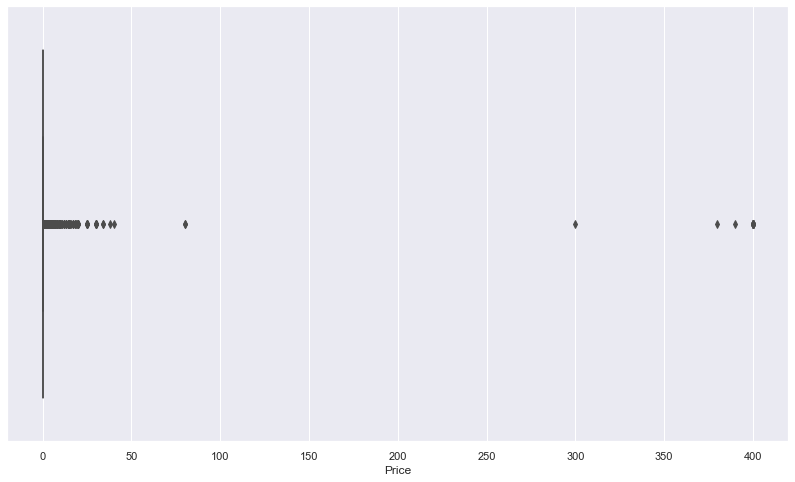

In [31]:
sns.boxplot(new_data['Price'])

### 5.2 Boxplot for Reviews

<AxesSubplot:xlabel='Reviews'>

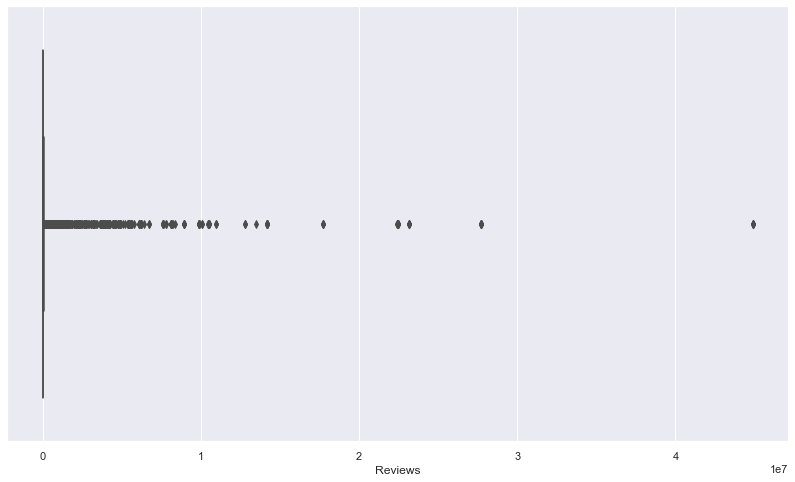

In [32]:
sns.boxplot(new_data['Reviews'])

### Boxplot for Rating

<AxesSubplot:xlabel='Rating'>

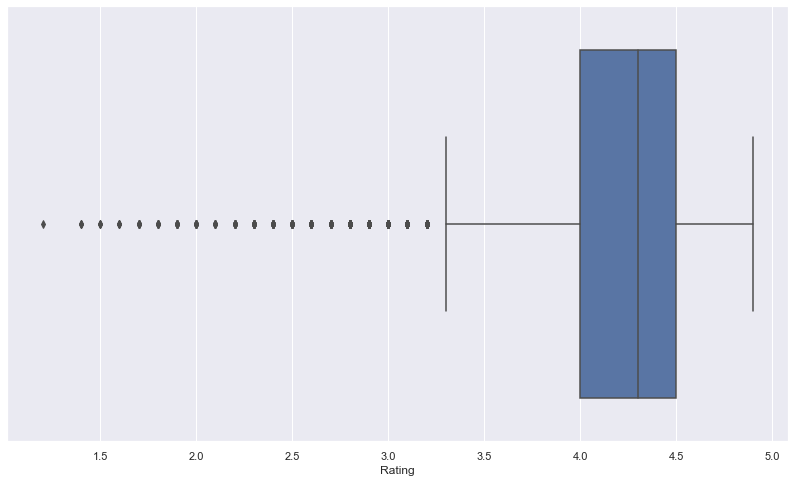

In [33]:
sns.boxplot(new_data['Rating'])

### Boxplot for Size

<AxesSubplot:xlabel='Size'>

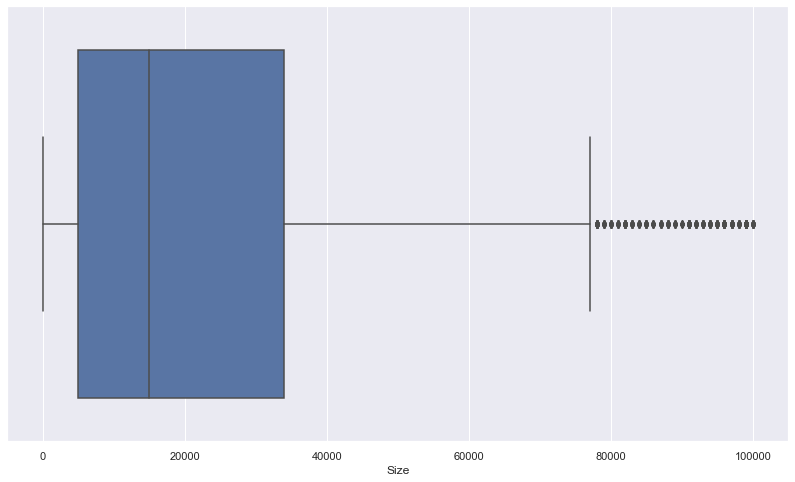

In [34]:
sns.boxplot(new_data['Size'])

### 5.3 Histogram for Rating

(array([   7.,   32.,   53.,   62.,  182.,  334.,  509., 1678., 3212.,
        1368.]),
 array([1.2 , 1.57, 1.94, 2.31, 2.68, 3.05, 3.42, 3.79, 4.16, 4.53, 4.9 ]),
 <BarContainer object of 10 artists>)

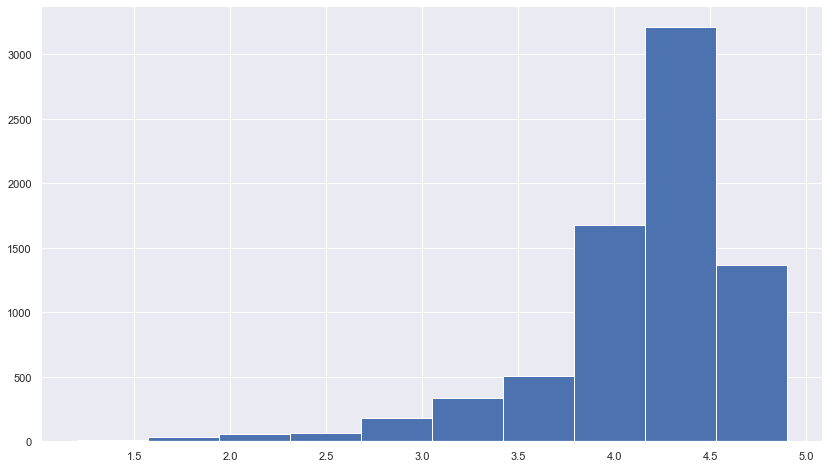

In [35]:
plt.hist(new_data['Rating'])

### 5.4 Histogram for Size

(array([3078., 1352.,  954.,  597.,  444.,  321.,  219.,  159.,  116.,
         197.]),
 array([8.00000e+00, 1.00072e+04, 2.00064e+04, 3.00056e+04, 4.00048e+04,
        5.00040e+04, 6.00032e+04, 7.00024e+04, 8.00016e+04, 9.00008e+04,
        1.00000e+05]),
 <BarContainer object of 10 artists>)

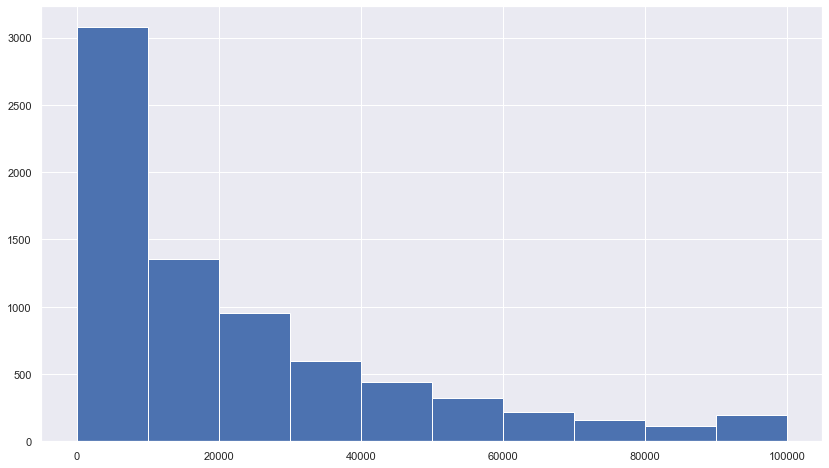

In [36]:
plt.hist(new_data['Size'])

##### All four columns seems to have outliers

### 6) Outlier treatment

### 6.1 Price

In [37]:
new_data['Price'].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,   7.49,   1.5 ,  19.99,
        15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,   3.88,
       399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,
         1.59, 299.99, 379.99,  37.99,  18.99, 389.99,   8.49,  14.  ,
         2.  ,   3.08,   2.59,  19.4 ,  15.46,   8.99,  13.99,   4.29,
         3.28,   4.6 ,   1.  ,  10.99,   2.9 ,   1.97,   2.56,   1.2 ,
         6.49,   1.29])

#### There are apps with very high prices. They will be dropped.

In [38]:
new_data = new_data[(new_data['Price'] < 200)]
new_data

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,10732,Draw with FP sDraw,TOOLS,4.3,3268,467,100000,Free,0.0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
7719,10755,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676,10000,Free,0.0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
7720,10763,FP Разбитый дисплей,FAMILY,4.5,922,552,50000,Free,0.0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
7721,10832,FR Tides,WEATHER,3.8,1195,582,100000,Free,0.0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


### 6.2 Reviews

In [39]:
new_data = new_data[(new_data['Reviews'] < 2000000)]
new_data

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,10732,Draw with FP sDraw,TOOLS,4.3,3268,467,100000,Free,0.0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
7719,10755,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676,10000,Free,0.0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
7720,10763,FP Разбитый дисплей,FAMILY,4.5,922,552,50000,Free,0.0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
7721,10832,FR Tides,WEATHER,3.8,1195,582,100000,Free,0.0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


### 6.3 Installs

In [40]:
np.percentile(new_data["Installs"],10)

1000.0

In [41]:
np.percentile(new_data["Installs"],25)

10000.0

In [42]:
np.percentile(new_data["Installs"],50)

100000.0

In [43]:
np.percentile(new_data["Installs"],70)

1000000.0

In [44]:
np.percentile(new_data["Installs"],90)

10000000.0

In [45]:
np.percentile(new_data["Installs"],95)

10000000.0

In [46]:
np.percentile(new_data["Installs"],99)

50000000.0

<AxesSubplot:xlabel='Installs', ylabel='Density'>

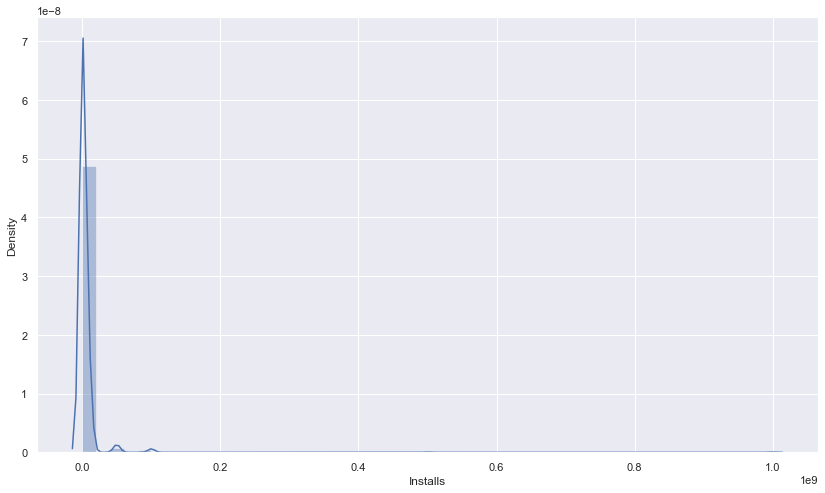

In [47]:
sns.distplot(new_data["Installs"])

#### Checking values greater than 50,000,000

In [48]:
len(new_data[new_data.Installs>=50000000.0])

176

#### Dropping values greater than 99th percentile

In [49]:
new_data.drop(new_data.index[new_data.Installs>=50000000.0],inplace=True)

In [50]:
new_data

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5000,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,10732,Draw with FP sDraw,TOOLS,4.3,3268,467,100000,Free,0.0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
7719,10755,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676,10000,Free,0.0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
7720,10763,FP Разбитый дисплей,FAMILY,4.5,922,552,50000,Free,0.0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
7721,10832,FR Tides,WEATHER,3.8,1195,582,100000,Free,0.0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


### 7) Bivariate Analysis

### 7.1 Scatterplot Prive vs Rating

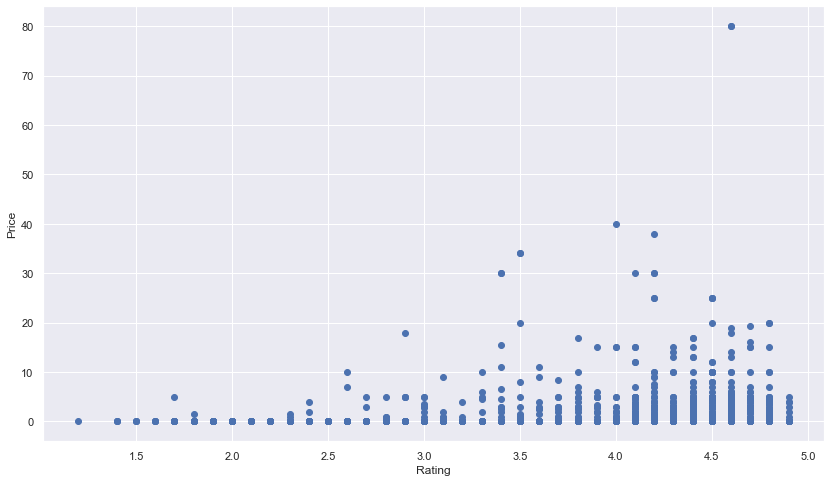

In [51]:
plt.scatter(new_data['Rating'], new_data['Price'])
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

##### It appears that having a Price does not mean better ratings. There is no clear pattern that paid apps get better ratings. Most data concentrates within Ratings 4.0 to 5.0 and Price between 0 and 10.

### 7.2 Scatterplot Rating vs Size

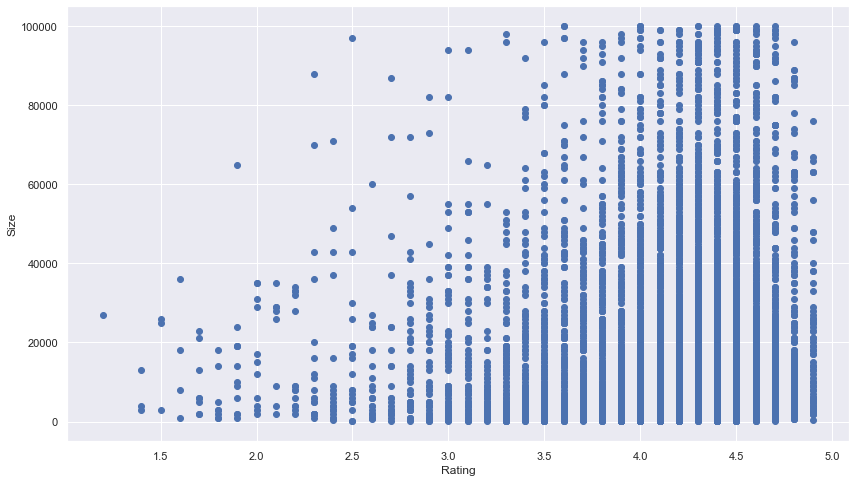

In [52]:
plt.scatter(new_data['Rating'], new_data['Size'])
plt.xlabel('Rating')
plt.ylabel('Size')
plt.show()

##### It seems that being heavy does not guarantee a higher rating. However, it appears that most heavy apps are rated above lighter ones.

### 7.3 Scatterplot Rating vs Reviews

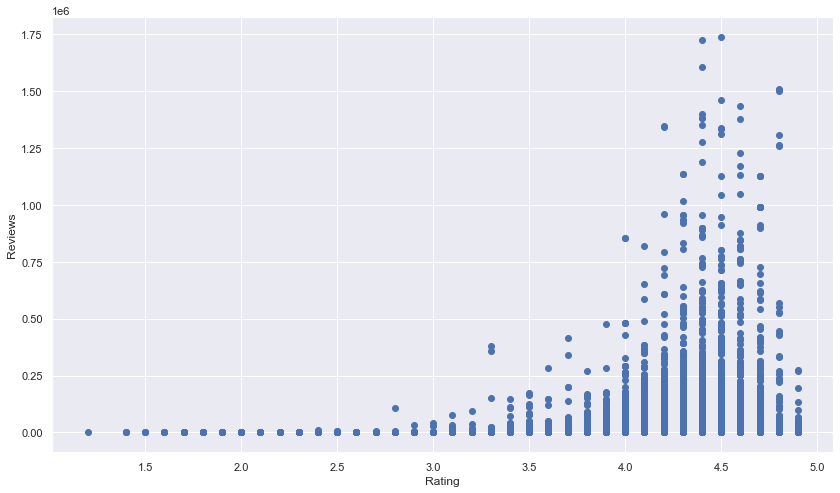

In [53]:
plt.scatter(new_data['Rating'], new_data['Reviews'])
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.show()

##### It seems that there is no clear pattern. As the reviews get higher, no clear relation with rating is noticed.

### 7.4 Boxplot Rating vs Content Rating

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

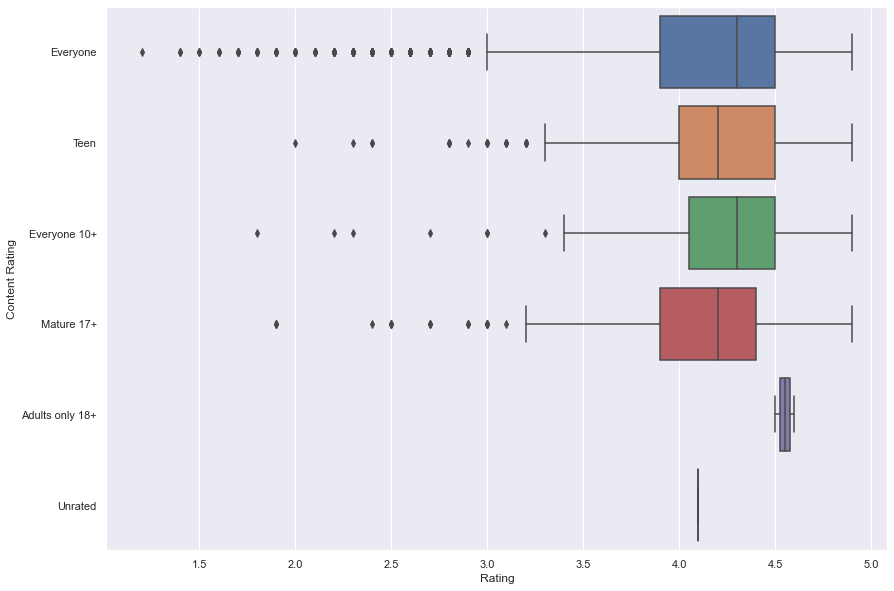

In [54]:
plt.figure(figsize = [14,10])
sns.boxplot(x = 'Rating', y = 'Content Rating', data = new_data)

##### The distributions of Rating between the different Content Rating categories have a significant overlap.There does not seem to be a difference between Content Ratings in relation to Ratings. The rating for “Adults Only 18+” is the highest.

### 7.5 Boxplot Rating vs Category

<AxesSubplot:xlabel='Rating', ylabel='Category'>

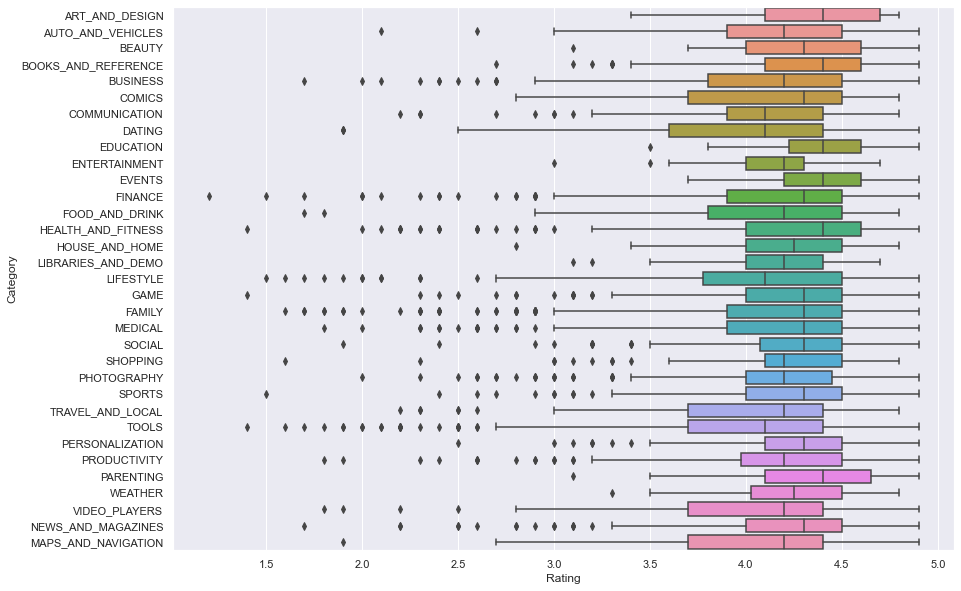

In [55]:
plt.figure(figsize = [14,10])
sns.boxplot(x = "Rating", y = "Category",data = new_data)

##### The distribution of the Ratings between the different types of Category is distinct enough to make Category as a potential good predictor of Ratings.

In [56]:
new_data

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5000,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,10732,Draw with FP sDraw,TOOLS,4.3,3268,467,100000,Free,0.0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
7719,10755,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676,10000,Free,0.0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
7720,10763,FP Разбитый дисплей,FAMILY,4.5,922,552,50000,Free,0.0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
7721,10832,FR Tides,WEATHER,3.8,1195,582,100000,Free,0.0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


In [57]:
new_data.columns

Index(['index', 'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

### 8) Data preprocessing

### Copy of dataframe

In [58]:
inp1 = new_data.copy()

In [59]:
inp1.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5000,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


### 8.1 Log transformation for Reviews and Installs

In [60]:
#to_log = ['Reviews', 'Installs']
#df_log = inp1[to_log].applymap(lambda x: np.log(x+1))
#df_log

In [61]:
inp1['Installs'] = np.log1p(inp1['Installs'])
inp1['Reviews'] = np.log1p(inp1['Reviews'])
inp1.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000,9.210440,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8000,15.424949,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2000,11.512935,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5000,10.819798,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [62]:
inp1.describe()

,index,Rating,Reviews,Size,Installs,Price
count,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000
mean,5475.003842,4.138679,7.575004,21818.132204,11.574610,0.389424
std,3129.545960,0.520541,3.259401,22724.451964,3.213750,2.415225
min,0.000000,1.200000,0.693147,8.000000,1.791759,0.000000
25%,2748.500000,3.900000,4.855921,5000.000000,9.210440,0.000000
50%,5523.000000,4.300000,7.681560,14000.000000,11.512935,0.000000
75%,8206.000000,4.500000,10.300012,31000.000000,13.815512,0.000000
max,10840.000000,4.900000,14.367155,100000.000000,16.118096,79.990000


In [63]:
continuous = inp1.describe().columns
inp1[continuous].head()

,index,Rating,Reviews,Size,Installs,Price
0,0,4.1,5.075174,19000,9.210440,0.0
1,1,3.9,6.875232,14000,13.122365,0.0
2,2,4.7,11.379520,8000,15.424949,0.0
4,4,4.3,6.875232,2000,11.512935,0.0
5,5,4.4,5.123964,5000,10.819798,0.0


In [64]:
from scipy.stats import zscore
inp1[continuous].head()

,index,Rating,Reviews,Size,Installs,Price
0,0,4.1,5.075174,19000,9.210440,0.0
1,1,3.9,6.875232,14000,13.122365,0.0
2,2,4.7,11.379520,8000,15.424949,0.0
4,4,4.3,6.875232,2000,11.512935,0.0
5,5,4.4,5.123964,5000,10.819798,0.0


In [65]:
inp1[continuous].apply(zscore).head()

,index,Rating,Reviews,Size,Installs,Price
0,-1.749581,-0.074311,-0.767014,-0.124022,-0.735694,-0.161248
1,-1.749261,-0.458554,-0.214709,-0.344065,0.481639,-0.161248
2,-1.748942,1.078417,1.167327,-0.608117,1.198168,-0.161248
4,-1.748303,0.309931,-0.214709,-0.872168,-0.019192,-0.161248
5,-1.747983,0.502053,-0.752044,-0.740142,-0.234886,-0.161248


In [66]:
inp1[continuous].apply(zscore).describe().round()

,index,Rating,Reviews,Size,Installs,Price
count,7027.0,7027.0,7027.0,7027.0,7027.0,7027.0
mean,0.0,-0.0,-0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.0,-6.0,-2.0,-1.0,-3.0,-0.0
25%,-1.0,-0.0,-1.0,-1.0,-1.0,-0.0
50%,0.0,0.0,0.0,-0.0,-0.0,-0.0
75%,1.0,1.0,1.0,0.0,1.0,-0.0
max,2.0,1.0,2.0,3.0,1.0,33.0


#### Mean of all numeric variables are 0 and std is 1 after normalization meaning that all continuous variables are assuming normal distribution.

### 8.2 Drop unnecessary columns

In [67]:
inp1 = inp1.drop(['App','Last Updated','Current Ver','Android Ver'], axis = 1).copy()

In [68]:
inp1.shape

(7027, 10)

### 8.3 Get dummy columns

In [69]:
inp2 = inp1.copy()

In [70]:
inp2.head()

,index,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,ART_AND_DESIGN,4.1,5.075174,19000,9.210440,Free,0.0,Everyone,Art & Design
1,1,ART_AND_DESIGN,3.9,6.875232,14000,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,2,ART_AND_DESIGN,4.7,11.379520,8000,15.424949,Free,0.0,Everyone,Art & Design
4,4,ART_AND_DESIGN,4.3,6.875232,2000,11.512935,Free,0.0,Everyone,Art & Design;Creativity
5,5,ART_AND_DESIGN,4.4,5.123964,5000,10.819798,Free,0.0,Everyone,Art & Design


In [71]:
inp2 = pd.get_dummies(inp2, columns = ['Category', 'Genres', 'Content Rating', 'Type'])

In [72]:
inp2.shape

(7027, 159)

In [73]:
inp2.head()

,index,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Type_Free,Type_Paid
0,0,4.1,5.075174,19000,9.210440,0.0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,3.9,6.875232,14000,13.122365,0.0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2,4.7,11.379520,8000,15.424949,0.0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,4,4.3,6.875232,2000,11.512935,0.0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5,5,4.4,5.123964,5000,10.819798,0.0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


### 9) and 10) Train test split  and apply 70-30 split & Separate the dataframes

In [74]:
# Train test split  and apply 70-30 split.Name the new dataframes df_train and df_test.
from sklearn.model_selection import train_test_split
df_train, df_test, = train_test_split(inp2, test_size = 0.3, random_state = 5)

In [75]:
df_train.shape

(4918, 159)

In [76]:
df_test.shape

(2109, 159)

In [77]:
y_train = df_train.pop('Rating')
x_train = df_train

In [78]:
y_test=df_test.pop('Rating')
x_test=df_test

### 11) Model building

In [79]:
# Use linear regression
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

In [80]:
inp2.dtypes

index                          int64
Rating                       float64
Reviews                      float64
Size                           int32
Installs                     float64
                              ...   
Content Rating_Mature 17+      uint8
Content Rating_Teen            uint8
Content Rating_Unrated         uint8
Type_Free                      uint8
Type_Paid                      uint8
Length: 159, dtype: object

In [81]:
# Give training
linear_reg.fit(x_train,y_train)

LinearRegression()

### Make predictions on test set and report R2

In [90]:
#let's define a variable y for predictions
y_pred = linear_reg.predict(x_test)

In [88]:
# Report the R2 on the train set
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.13217077859003656


In [85]:
# Predictions:
y_pred

array([4.12252395, 4.17277354, 4.43136729, ..., 3.93762342, 4.17691163,
       4.10343752])